# Orthogonal Matching Pursuit (OMP)

正交匹配追踪？
OrthogonalMatchingPursuit 和 orthogonal_mp实现了OMP算法，用于逼近对非零系数（L0伪范数）施加约束的线性模型的拟合。
作为一个类似于前向特征选择方法Least Angle Regression，OMP算法能使用一个固定数量非零元素逼近最优解向量。
【插入图片1】

同样的，OMP算法可以追踪一个特定的误差，而不是指定数量的非零系数，可以表示为：
【插入图片2】

OMP基于一种贪婪算法，在每一步，atom？与当前的残差高度相关。类似于简单的匹配追踪MP方法，但更好的是，在每次迭代时，都会在先前选择的字典元素的空间上用正交投影重新计算残差。

## Example：Orthogonal Matching Pursuit


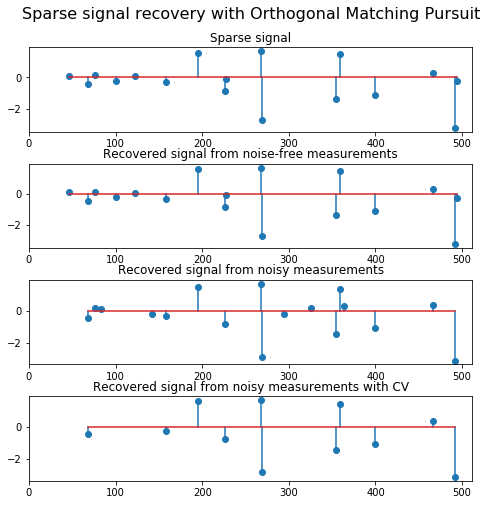

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

#定义组件和特征数量
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# 生成数据
###################
# y = Xw
# |x|_0 = n_nonzero_coefs
y, X, w = make_sparse_coded_signal(n_samples=1,n_components=n_components,n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,random_state=0)
idx, = w.nonzero()
# 添加噪声
y_noisy = y + 0.05 * np.random.randn(len(y))

# 绘制稀疏信号
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])
# plot the noisy reconstruction with number of non-zeros set by CV

omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])
plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',fontsize=16)
plt.show()
